## Class 4: Data Wrangling and Exploratory Data Analysis 

## Learning Objectives

By the end of today's class you will be able to:

- review logical statements

- select subsets of rows using operators `!=`, `>`, `>=`, `<`, `<=`

- operations on `pandas` `Series` and `DataFrames`.

- join two data frames

- Grouped summaries of data

- Define statistical variables from data using Python.

- Define and interpret statistical distributions.

<!--
- Understand the difference between categorical (nominal and ordered) , and interval variables.

- Create numerical and visual data summaries of categorical variables using Python.

- Understand how to interpret categorical variables and bar charts in context.

- Create numerical and visual data summaries of categorical variables using Python.

- Understand how to compute and interpret frequency and cumulative frequency distributions.

- Understand strategies on managing missing values and the implications on data interpretations.
-->

## Let's start by reviewing logical statements

- last week we were using or `|`, and `&`, equivalent `==`, and not equivalent `!=`

We saw the following in a few assignments:

`unmarried = (married_status !=1) | (married_status !=2)
married = (married_status == 1) | (married_status ==2)`

what is best is:

`unmarried = (married_status !=1) & (married_status != 2)`

# More on Selecting Rows/Selecting Subsets/Filtering Rows

- Last week we discussed how to select rows using `&`, `|` by creating Boolean variables that correspond to creating subsets of a data frame (e.g., urban and middle age).

- This week we will consider selecting subsets using:
  + `!=` - not equal
  + `>` - greater than
  + `>=` - greater than or equal to
  + `<` - less than
  + `<=` - less than or equal to

In [1]:
import pandas as pd

time_use_df = pd.read_csv('gss_tu2016_main_file.csv')

`dur01` is time spent sleeping, resting, etc. Let's rename it to `RRtime`.

```
dur01              Duration - Sleeping, resting, relaxing, sick in bed

           VALUE  LABEL
               0  No time spent doing this activity
            9996  Valid skip
            9997  Don't know
            9998  Refusal
            9999  Not stated

           Data type: numeric
           Missing-data codes: 9996-9999
           Record/columns: 1/65-68
```

In [2]:
RRtime = time_use_df['dur01']
RRtime.head()

0    510
1    420
2    570
3    510
4    525
Name: dur01, dtype: int64

What is the average `RRtime`?

We can use the `pandas` function `mean()` to compute the mean time spent sleeping, resting, etc. 

In [3]:
RRtime.mean()

522.3930994824611

Is this accurate?

Let's check for missing values.

In [4]:
RRmissing = (RRtime == 9996) | (RRtime == 9997)| (RRtime == 9998)| (RRtime == 9999)
RRmissing.value_counts()

False    17390
Name: dur01, dtype: int64

How many people reported 0 time spent on RR?

In [5]:
noRR = RRtime == 0
noRR.value_counts()

False    17374
True        16
Name: dur01, dtype: int64

- It's not missing, but seems not to be correct.  What would happen to the average time spent on rest if we **excluded** respondents that reported 0?

- There are a few ways to do approach excluding these rows of `RRtime`.


## Use not-equal to operator `!=` 

A Boolean series that is `True` when `RRtime` is not equal to `0` and `False` otherwise.

In [6]:
someRR = RRtime != 0

someRR.head()

0    True
1    True
2    True
3    True
4    True
Name: dur01, dtype: bool

In [7]:
someRR.value_counts()

True     17374
False       16
Name: dur01, dtype: int64

## Use not-equal to operator `>` 

A Boolean series that is `True` when `RRtime` is greater than `0` and `False` otherwise.

In [8]:
someRR = RRtime > 0

someRR.value_counts()

True     17374
False       16
Name: dur01, dtype: int64

OK.  But, what about the mean when we exclude the 16 people that reported 0 time spent on rest?

In [9]:
print(RRtime.mean())
RRtime[someRR].mean()

522.3930994824611


522.8741798089098

- Oh, but which number excludes rest time of 0?  Let's be more descriptive.  Also, what's the difference between the two values?

- We can use several print statements to create descriptive output.

In [10]:
label_all = 'The mean rest time of all respondents is:'

mean_all = RRtime.mean()

label_nozero = 'The mean rest time except respondents with 0 is:'

mean_nozero = RRtime[someRR].mean()

label_diff = 'The difference between all repondents and excluding those with 0 is:'

diff = mean_all - mean_nozero

print(label_all, mean_all)

print('\n') # add a new line

print(label_nozero, mean_nozero)

print('\n') # add a new line

print(label_diff, diff)

The mean rest time of all respondents is: 522.3930994824611


The mean rest time except respondents with 0 is: 522.8741798089098


The difference between all repondents and excluding those with 0 is: -0.4810803264487049


- What proportion of respondents got at least 7 hours, but less than 8.5 hours rest?

- At least 7 hours means 7 hours or more.

- Less than 8.5 hours means at most 8.5 hours, but not including 8.5 hours.

In [11]:
between785 = (RRtime >= 7) & (RRtime < 8.5)
between785.value_counts()

False    17390
Name: dur01, dtype: int64

- What's wrong?  

- Time is measured in minutes not hours.

- So, let's convert `RRtime` to hours.  How?

- 60 minutes = 1 hour.  So, 1 minute = 1/60 hour.  Since `RRtime` is in minutes we can multiply it by 1/60 to change it to hours.

In [12]:
RRtime_hours = RRtime/60
RRtime_hours.head()

0    8.50
1    7.00
2    9.50
3    8.50
4    8.75
Name: dur01, dtype: float64

Now, let's try selecting rows.

In [13]:
between785 = (RRtime_hours >= 7) & (RRtime_hours < 8.5)
between785.value_counts()

False    11960
True      5430
Name: dur01, dtype: int64

In [14]:
counts = between785.value_counts()
counts

False    11960
True      5430
Name: dur01, dtype: int64

- `counts[1]` is the number of respondents that rested between 7 and 8.5 hours.

- `counts.sum()` is the total number of respondents.

- So, `counts[1]/counts.sum()` is the proportion of total respondents that rested between 7 and 8.5 hours.


In [15]:
prop = counts[1]/counts.sum()
prop

0.31224841863139735

Too many decimal places.  Let's round it with the pandas function `.round(n)`, where `n` is the number of decimal places to keep.

In [16]:
prop.round(2)

0.31

Say, we wanted to report as a percentage.  Then we would multiply the proportion by 100.  

In [17]:
prop.round(2)*100

31.0

Now, we can report as a percentage using a `print()` statement.

In [18]:
prop_perc = prop.round(2)*100

prop_msg = '% of respondents reported sleeping between 7 and 8.5 hours.'

print(prop_perc, prop_msg)

31.0 % of respondents reported sleeping between 7 and 8.5 hours.


# Data transformations with `pandas` series and DataFrames

Numeric variables that are integers or floats can be multiplied, divided, added, and subtracted.

Suppose we discovered that by accident all of the data for time spent resting `RRtime` had an extra 5 minutes, except for those respondents that have a 0 for this variable. But we also want to keep the respondents with values of 0. How can we clean-up this mistake?

In [19]:
someRR = RRtime != 0

noRR = RRtime == 0

RRtime_corrected = RRtime[someRR] - 5 

In [20]:
time_use_df_cor = time_use_df.copy()

time_use_df_cor.loc[someRR, 'RR_cor'] = RRtime_corrected

time_use_df_cor.loc[noRR, 'RR_cor'] = 0

time_use_df_cor[['RR_cor', 'dur01']].head()

,RR_cor,dur01
0,505.0,510
1,415.0,420
2,565.0,570
3,505.0,510
4,520.0,525


- Looks good.  

- Next, view only rows that are 0.

In [21]:
no_time = time_use_df_cor['RR_cor'] == 0

time_use_df_cor.loc[no_time, ['RR_cor', 'dur01']]

,RR_cor,dur01
167,0.0,0
2601,0.0,0
2925,0.0,0
3511,0.0,0
4509,0.0,0
5038,0.0,0
8057,0.0,0
9768,0.0,0
10764,0.0,0
12145,0.0,0


# Joining Tables, Web Scraping

We want would like to look at the relationships, such as the relationship between sleeping and working, on different aspects of time use at the provincial level.  In addition we would like to add provinical level data of on income and housing.


In [22]:
prov_data = pd.read_csv('provincial_data.csv')
prov_data

,COL0,COL1,COL2,COL3,COL4
0,1,60.2,70336.0,2.4,16.6
1,10,49.5,67272.0,2.3,10.6
2,11,58.2,61163.0,2.3,11.1
3,12,55.2,60764.0,2.3,12.0
4,13,54.6,59347.0,2.3,10.3
5,24,59.5,59822.0,2.3,12.9
6,35,59.9,74287.0,2.6,19.8
7,46,61.7,68147.0,2.5,11.4
8,47,63.5,75412.0,2.5,12.1
9,48,65.4,93835.0,2.6,15.1



```
COL0 - GEO UID
COL1 - Labour - Total Sex / Employment rate
COL2 - Income - Total Sex / Total - Income statistics in 2015 for private households by household size - 100% data / Median total income of households in 2015 ($)
COL3 - Dwelling characteristics / Average household size

COL4 - Housing - Total Sex / Total - Owner households in non-farm, non-reserve private dwellings - 25% sample data / % of owner households spending 30% or more of its income on shelter costs
```

Let's give the columns meaningful names.

In [23]:
colnames = {'COL0':'Prov', 
            'COL1':'Employment Rate', 
            'COL2':'Income',
            'COL3': 'Household Size',
            'COL4': 'Pct house over 30'}

prov_data.rename(columns = colnames, inplace=True)
prov_data

,Prov,Employment Rate,Income,Household Size,Pct house over 30
0,1,60.2,70336.0,2.4,16.6
1,10,49.5,67272.0,2.3,10.6
2,11,58.2,61163.0,2.3,11.1
3,12,55.2,60764.0,2.3,12.0
4,13,54.6,59347.0,2.3,10.3
5,24,59.5,59822.0,2.3,12.9
6,35,59.9,74287.0,2.6,19.8
7,46,61.7,68147.0,2.5,11.4
8,47,63.5,75412.0,2.5,12.1
9,48,65.4,93835.0,2.6,15.1


Let's give the columns meaningful names.

In [24]:
prov_data.rename(columns = {'COL0':'Prov', 
                            'COL1':'Employment Rate', 
                            'COL2':'Income',
                            'COL3': 'Household Size',
                            'COL4': 'Pct house over 30'}, inplace=True)
prov_data

,Prov,Employment Rate,Income,Household Size,Pct house over 30
0,1,60.2,70336.0,2.4,16.6
1,10,49.5,67272.0,2.3,10.6
2,11,58.2,61163.0,2.3,11.1
3,12,55.2,60764.0,2.3,12.0
4,13,54.6,59347.0,2.3,10.3
5,24,59.5,59822.0,2.3,12.9
6,35,59.9,74287.0,2.6,19.8
7,46,61.7,68147.0,2.5,11.4
8,47,63.5,75412.0,2.5,12.1
9,48,65.4,93835.0,2.6,15.1


But, what do the codes provincial codes represent?

# Web Scrapping a Table

<!-- 
<img src="statscanwebpage.png" width="600" height="200"> 
-->

![](statscanwebpage.png)

- `pandas` can read *some* tables from websites using the function `read_html()`. 

- You won't have to know how to do this for any table, and we will help you with the coding.

In [25]:
statscanurl = 'https://www12.statcan.gc.ca/census-recensement/2016/ref/dict/geo038-eng.cfm'

statscan = pd.read_html(statscanurl)

statscan_df = statscan[0]

In [26]:
statscan_df

,Province/Territory,Standard abbreviationsEnglish/French,Internationally approvedalpha code(Source: Canada Post),Standard geographicalclassification (SGC) code,Region name
0,Newfoundland and Labrador,N.L./T.-N.-L.,NL,10,Atlantic
1,Prince Edward Island,P.E.I./Î.-P.-É.,PE,11,Atlantic
2,Nova Scotia,N.S./N.-É.,NS,12,Atlantic
3,New Brunswick,N.B./N.-B.,NB,13,Atlantic
4,Quebec,Que./Qc,QC,24,Quebec
5,Ontario,Ont./Ont.,ON,35,Ontario
6,Manitoba,Man./Man.,MB,46,Prairies
7,Saskatchewan,Sask./Sask.,SK,47,Prairies
8,Alberta,Alta./Alb.,AB,48,Prairies
9,British Columbia,B.C./C.-B.,BC,59,British Columbia


Let's exclude the last row (row 14), and keep the third and fourth columns.

In [27]:
statscan_df.iloc[0:13, 2:4]

,Internationally approvedalpha code(Source: Canada Post),Standard geographicalclassification (SGC) code
0,NL,10
1,PE,11
2,NS,12
3,NB,13
4,QC,24
5,ON,35
6,MB,46
7,SK,47
8,AB,48
9,BC,59


In [28]:
statscan_df1 = statscan_df.iloc[0:13, 2:4]
statscan_df1

,Internationally approvedalpha code(Source: Canada Post),Standard geographicalclassification (SGC) code
0,NL,10
1,PE,11
2,NS,12
3,NB,13
4,QC,24
5,ON,35
6,MB,46
7,SK,47
8,AB,48
9,BC,59


In [29]:
statscan_df1_names = list(statscan_df1)

colnames = {statscan_df1_names[0]: 'Prov_ab',
            statscan_df1_names[1]: 'Prov'}

statscan_df1.rename(columns = colnames, inplace = True)

statscan_df1

,Prov_ab,Prov
0,NL,10
1,PE,11
2,NS,12
3,NB,13
4,QC,24
5,ON,35
6,MB,46
7,SK,47
8,AB,48
9,BC,59


- Now let's check the types of all the columns in `statscan_df1`.

- We can do this using the pandas function `dtypes`.

In [30]:
statscan_df1.dtypes

Prov_ab    object
Prov       object
dtype: object

Type `object` means it's a mixture of types.

The `Prov` column in `prov_data` type is

In [31]:
prov_data['Prov'].head()

0     1
1    10
2    11
3    12
4    13
Name: Prov, dtype: int64

In [32]:
prov_data['Prov'].dtype

dtype('int64')

- We want to merge `statscan_df1` and `Prov` using the numbers assigned to the provinces.

- So, we need to be sure that `statscan_df1[Prov]` is an integer.

- We can change the type using the `pandas` function `astype()` to change the type to `int`.

- Then, finally we can replace the column `Prov` with the correct type using an assignment statement.

In [33]:
Prov_int = statscan_df1['Prov'].astype('int')

statscan_df1['Prov'] = Prov_int

statscan_df1['Prov']

0     10
1     11
2     12
3     13
4     24
5     35
6     46
7     47
8     48
9     59
10    60
11    61
12    62
Name: Prov, dtype: int64

Now, we are ready to use the `merge` function in `pandas`. 

In [34]:
prov_data_df = statscan_df1.merge(prov_data, 
                                  right_on= 'Prov', # the right data frame is prov_data 
                                  left_on='Prov')   # the left data frame is prov_data 

prov_data_df

,Prov_ab,Prov,Employment Rate,Income,Household Size,Pct house over 30
0,NL,10,49.5,67272.0,2.3,10.6
1,PE,11,58.2,61163.0,2.3,11.1
2,NS,12,55.2,60764.0,2.3,12.0
3,NB,13,54.6,59347.0,2.3,10.3
4,QC,24,59.5,59822.0,2.3,12.9
5,ON,35,59.9,74287.0,2.6,19.8
6,MB,46,61.7,68147.0,2.5,11.4
7,SK,47,63.5,75412.0,2.5,12.1
8,AB,48,65.4,93835.0,2.6,15.1
9,BC,59,59.6,69995.0,2.4,20.7


Add a visual of what just happened using screen shots of excel tables.

# Is time spent resting different by province?

## Grouped summaries of data 

- Many times we will want to calculate means, proportions, and other statistics by group membership.

- This is so common that `pandas` has a built-in function called `groupby` that groups a data frame by another variable.

In [35]:
Restprov_df = time_use_df[['dur01','prv']]

Restprov_df_grouped = Restprov_df.groupby('prv') #group the dataframe by prov

Restprov_df_grouped.mean()  # calc the mean for each prov

,dur01
prv,
10,519.104339
11,534.065385
12,510.055019
13,523.340265
24,525.554724
35,516.742869
46,529.791411
47,529.470905
48,522.629888


- But, what does `prv` 10 represent?

- We can merge `time_use_df` and `prov_data_df` 

In [36]:
time_use_prov = time_use_df.merge(prov_data_df, 
                                  left_on='prv', 
                                  right_on='Prov')
time_use_prov[['Prov_ab','prv']].head()

,Prov_ab,prv
0,MB,46
1,MB,46
2,MB,46
3,MB,46
4,MB,46


In [37]:
Restprov_df = time_use_prov[['dur01','Prov_ab']]

Restprov_df_grouped = Restprov_df.groupby('Prov_ab') #group the dataframe by prov

RRmeans_prov = Restprov_df_grouped.mean()  # calc the mean for each prov

RRmeans_prov_hrs = RRmeans_prov/60 # express the result in hours

RRmeans_prov_hrs

,dur01
Prov_ab,
AB,8.710498
BC,8.808136
MB,8.829857
NB,8.722338
NL,8.651739
NS,8.500917
ON,8.612381
PE,8.901090
QC,8.759245


Which province gets the most and least rest?

In [38]:
max = RRmeans_prov_hrs.max()[0]

max_row = RRmeans_prov_hrs['dur01'] == max

RRmeans_prov_hrs.loc[max_row,]

,dur01
Prov_ab,
PE,8.90109


# Statistical Variables


- A **categorical variable** is a variable for which the measurement scale consists of a set of categories.  For example, time use has ten categories or **levels**.  These types of variables are very common in social and biomedical sciences, and many other areas. 

- Categorical variables that don't have a natural ordering is called a **nominal variable**.

- If a categorical variable has a natural ordering it is called an **ordinal variable**.  For example, if **levels** `96,97,98,99` are removed from `gtu_110` then time use would be considered an ordinal variable since it's ordered from feeling rushed `Every day` (`1`) to feeling rushed `Never` (`6`). 

- **Ordinal variables** clearly order categories, but the "distance" between categories are unknown. A person categorized as feeling rushed `About once a week` feels more rushed than someone who feels rushed `About once a month`, although we cannot give a numnerical value for how much more rushed that person is.

- An **interval variable** is one that does have numerical distances between any two levels of the measurement scale.  For example, age measured in years is an interval variable.

- Time use is an example of an **interval (statistical) variable**.

# What's the difference between a Statistical Variable and a Variable in python?

- A variable in python is a location in computer memory to store a value.

- A statistical variable is essentially a mathematical representation of data.

## Examples of implementing statistical variables in python

If 10 people are *randomly* selected, and asked how many minutes they slept last night, then this data could be represented by an **interval variable**.
   + In python the data could be represented in `pandas` `series`, where the `series` data type is float.

If 10 people are *randomly* selected, and asked if they live in urban or rural areas, then this data could be represented by an **categorical variable**.
   + In python the data could be represented in `pandas` `series`, where the `series` data type is Boolean (`True` if urban, and `False` if not urban).




# Statistical Distributions

- What is a statistical distribution?

- How can a distribution be summarized?

- What questions can we answer using a distribution? 

# What is the distribution of kids under 14 in Ontario?

1. Select rows in `time_use_prov` where `Prov_ab` is `ON`: `time_use_prov['Prov_ab'] == 'ON'`

2. After the rows are selected then select the column corresponding to time spent resting `dur01`: `time_use_prov.loc[Ontario_rows, 'chh0014c']`

In [39]:
Ontario_rows = time_use_prov['Prov_ab'] == 'ON' 

Ontario_kids = time_use_prov.loc[Ontario_rows, 'chh0014c']

type(Ontario_kids)

pandas.core.series.Series

# Distributions

- The **distribution** of a statistical variable tells us what values it takes and how often it takes these values.

## Summarizing the distribution of qualitative variable

- The `pandas` function `value_counts()` summarizes the distribution of categorical variable.

In [40]:
Ontkidsdist_counts = Ontario_kids.value_counts()
Ontkidsdist_counts

0    3918
1     508
2     430
3     157
Name: chh0014c, dtype: int64

- This is the distribution of number of kids in Ontario.

- It can be visualized in a bar plot.

- The bars represent the frequency of observations (rows) and the labels on the horizontal axis represent the number of kids in a respondents household. 

In [ ]:
Ontkidsdist_counts.plot.bar()

If we want to plot proportions instead of counts then we can transform `Ontkidsdist` by dividing by the total number of observations.

In [80]:
Ontkidsdist_prop = Ontkidsdist_counts/Ontkidsdist_counts.sum()
Ontkidsdist_prop

0    0.781568
1    0.101337
2    0.085777
3    0.031319
Name: chh0014c, dtype: float64

<AxesSubplot:>

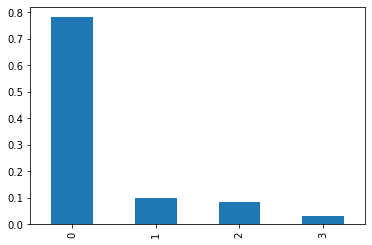

In [81]:
Ontkidsdist_prop.plot.bar()

How does the distribution change across provinces?

In [82]:
Alberta_rows = time_use_prov['Prov_ab'] == 'AB' 

Alberta_kids = time_use_prov.loc[Alberta_rows, 'chh0014c']

Albertakidsdist = Alberta_kids.value_counts()

Albertakids_prop = Albertakidsdist/Albertakidsdist.sum()

Albertakids_prop

0    0.752095
1    0.106145
2    0.101257
3    0.040503
Name: chh0014c, dtype: float64

- Storing the distributions of kids under 14 in a `DataFrame` allows for side-by-side comparison 

In [83]:
ABON_df = pd.DataFrame([Albertakids_prop, Ontkidsdist_prop], index = ['AB', 'ON'])
ABON_df

,0,1,2,3
AB,0.752095,0.106145,0.101257,0.040503
ON,0.781568,0.101337,0.085777,0.031319


- The `ABON_df` can be plotted using `plot.bar()`

<AxesSubplot:>

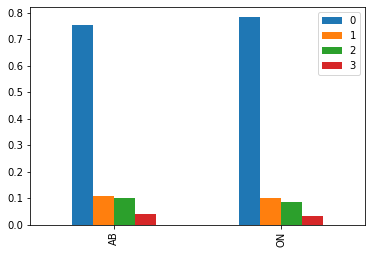

In [84]:
ABON_df.plot.bar()

Are the distributions similar?